PROBLEM 1#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
#LOADING DATA#
mdata = pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_Multinomial\\mdata.csv')

In [3]:
mdata.head(5)

Unnamed: 0   id  female     ses  schtyp      prog  read  write  math  \
0           1   45  female     low  public  vocation    34     35    41   
1           2  108    male  middle  public   general    34     33    41   
2           3   15    male    high  public  vocation    39     39    44   
3           4   67    male     low  public  vocation    37     37    42   
4           5  153    male  middle  public  vocation    39     31    40   

   science        honors  
0       29  not enrolled  
1       36  not enrolled  
2       26  not enrolled  
3       33  not enrolled  
4       39  not enrolled

In [4]:
mdata.tail(5)

Unnamed: 0   id  female     ses  schtyp      prog  read  write  math  \
195         196  100  female    high  public  academic    63     65    71   
196         197  143    male  middle  public  vocation    63     63    75   
197         198   68    male  middle  public  academic    73     67    71   
198         199   57  female  middle  public  academic    71     65    72   
199         200  132    male  middle  public  academic    73     62    73   

     science    honors  
195       69  enrolled  
196       72  enrolled  
197       63  enrolled  
198       66  enrolled  
199       69  enrolled

In [5]:
#EDA#
mdata.describe()

Unnamed: 0          id        read       write        math     science
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  100.500000   52.230000   52.775000   52.645000   51.850000
std     57.879185   57.879185   10.252937    9.478586    9.368448    9.900891
min      1.000000    1.000000   28.000000   31.000000   33.000000   26.000000
25%     50.750000   50.750000   44.000000   45.750000   45.000000   44.000000
50%    100.500000  100.500000   50.000000   54.000000   52.000000   53.000000
75%    150.250000  150.250000   60.000000   60.000000   59.000000   58.000000
max    200.000000  200.000000   76.000000   67.000000   75.000000   74.000000

In [6]:
mdata.prog.value_counts()

academic    105
vocation     50
general      45
Name: prog, dtype: int64

In [7]:

#removing unnamed colums #
mdata.drop(mdata.iloc[:,[0,1]],axis=1 , inplace = True)

In [8]:
mdata.head()

female     ses  schtyp      prog  read  write  math  science        honors
0  female     low  public  vocation    34     35    41       29  not enrolled
1    male  middle  public   general    34     33    41       36  not enrolled
2    male    high  public  vocation    39     39    44       26  not enrolled
3    male     low  public  vocation    37     37    42       33  not enrolled
4    male  middle  public  vocation    39     31    40       39  not enrolled

In [9]:
##label encoding for categorical data#
lb=LabelEncoder()
mdata['female']= lb.fit_transform(mdata['female'])
mdata['ses']= lb.fit_transform(mdata['ses'])
mdata['schtyp']= lb.fit_transform(mdata['schtyp'])
mdata['honors']= lb.fit_transform(mdata['honors'])

In [10]:
mdata.head()

female  ses  schtyp      prog  read  write  math  science  honors
0       0    1       1  vocation    34     35    41       29       1
1       1    2       1   general    34     33    41       36       1
2       1    0       1  vocation    39     39    44       26       1
3       1    1       1  vocation    37     37    42       33       1
4       1    2       1  vocation    39     31    40       39       1

<AxesSubplot:xlabel='prog', ylabel='honors'>

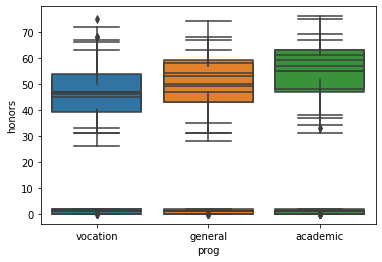

In [11]:
##boxplotting#
sns.boxplot(x='prog', y='female', data=mdata)
sns.boxplot(x='prog', y='ses', data=mdata)
sns.boxplot(x='prog', y='schtyp', data=mdata)
sns.boxplot(x='prog', y='read', data=mdata)
sns.boxplot(x='prog', y='write', data=mdata)
sns.boxplot(x='prog', y='math', data=mdata)
sns.boxplot(x='prog', y='science', data=mdata)
sns.boxplot(x='prog', y='honors', data=mdata)

<AxesSubplot:xlabel='prog', ylabel='honors'>

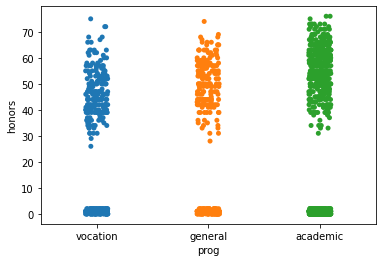

In [12]:
##scatter plot#
sns.stripplot(x = "prog", y = "female", jitter = True, data = mdata)
sns.stripplot(x='prog', y='ses', jitter = True, data = mdata)
sns.stripplot(x='prog', y='schtyp', jitter = True, data = mdata)
sns.stripplot(x='prog', y='read', jitter = True, data = mdata)
sns.stripplot(x='prog', y='write', jitter = True, data = mdata)
sns.stripplot(x='prog', y='math', jitter = True, data = mdata)
sns.stripplot(x='prog', y='science', jitter = True, data = mdata)
sns.stripplot(x='prog', y='honors', jitter = True, data = mdata)

In [13]:
#correlation matrix#
mdata.corr()

female       ses    schtyp      read     write      math   science  \
female   1.000000  0.013684  0.015337  0.053084 -0.256492  0.029338  0.127745   
ses      0.013684  1.000000 -0.033185 -0.177008 -0.162496 -0.153885 -0.131742   
schtyp   0.015337 -0.033185  1.000000 -0.086201 -0.127228 -0.098309 -0.064629   
read     0.053084 -0.177008 -0.086201  1.000000  0.596776  0.662280  0.630158   
write   -0.256492 -0.162496 -0.127228  0.596776  1.000000  0.617449  0.570442   
math     0.029338 -0.153885 -0.098309  0.662280  0.617449  1.000000  0.630733   
science  0.127745 -0.131742 -0.064629  0.630158  0.570442  0.630733  1.000000   
honors   0.139122  0.262474 -0.014834 -0.489417 -0.675724 -0.541691 -0.417503   

           honors  
female   0.139122  
ses      0.262474  
schtyp  -0.014834  
read    -0.489417  
write   -0.675724  
math    -0.541691  
science -0.417503  
honors   1.000000

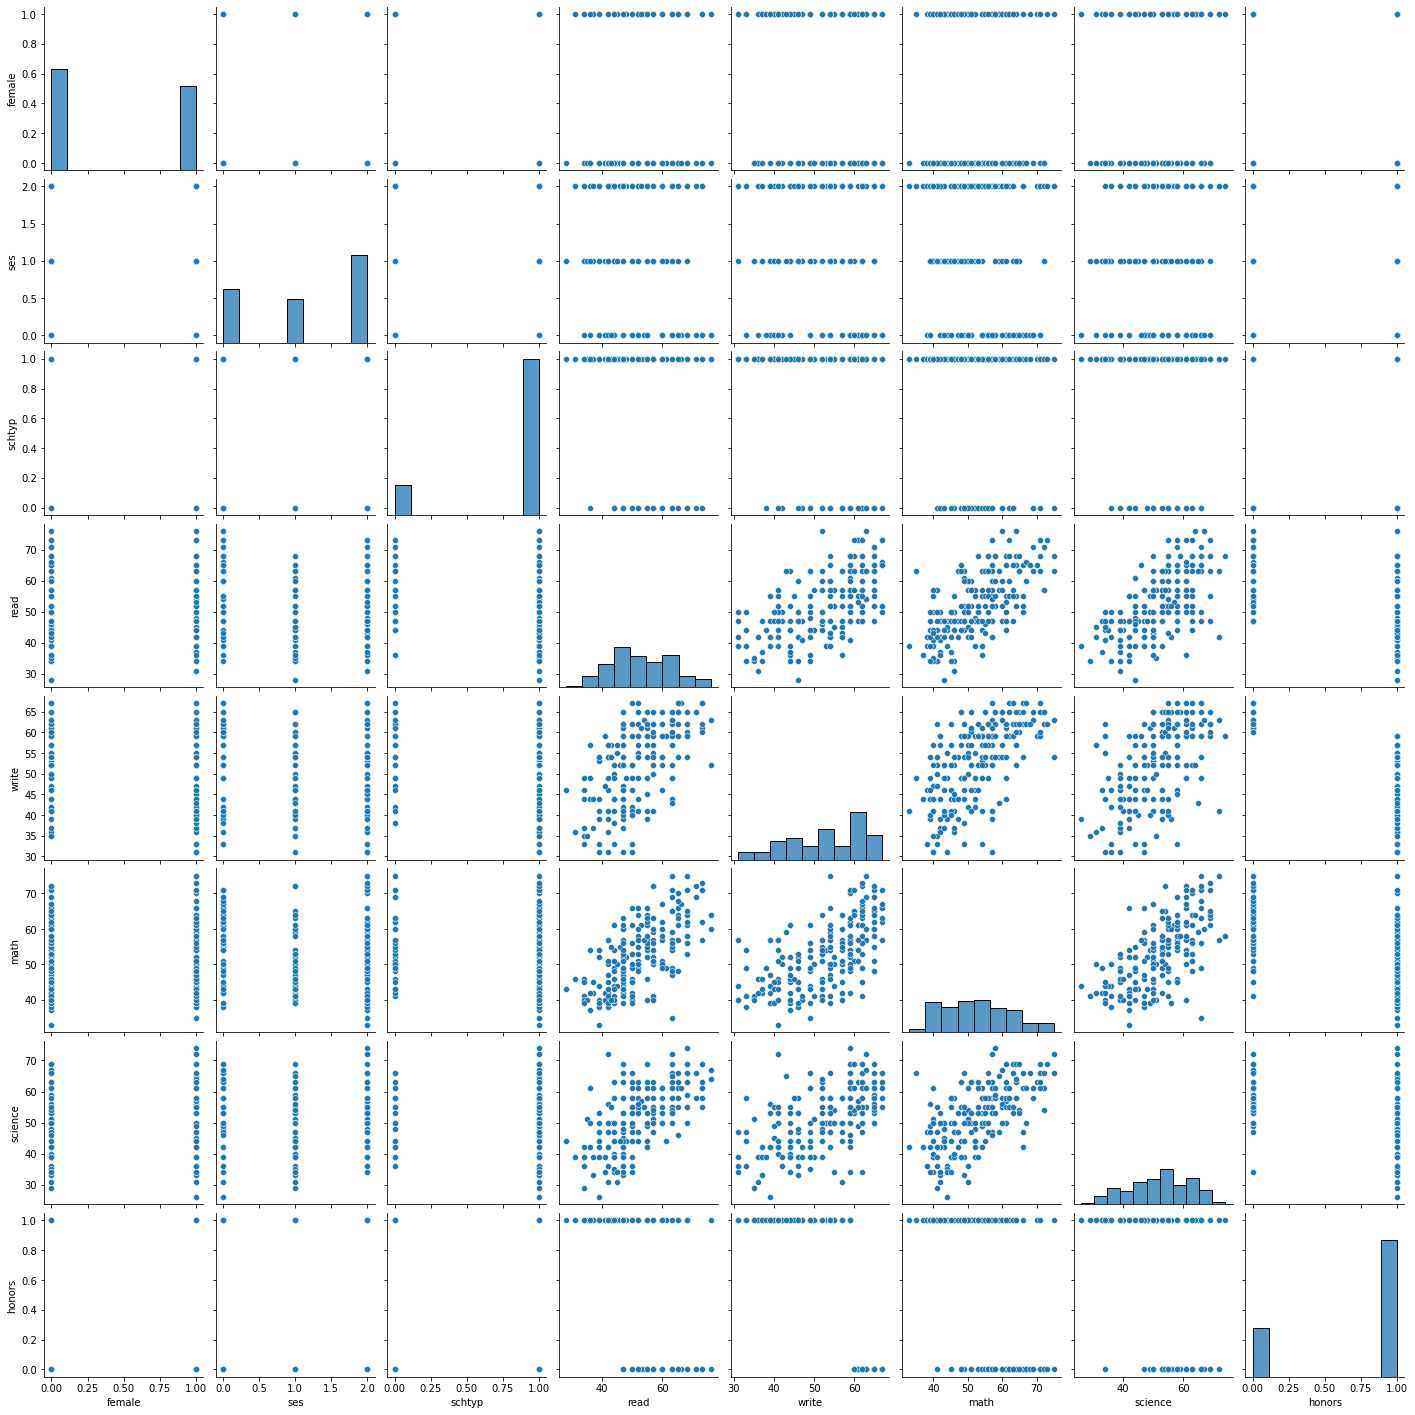

In [14]:
## Scatter plot between each possible pair of independent variable and also histogram for each independent variable #
sns.pairplot(mdata)  # Normal

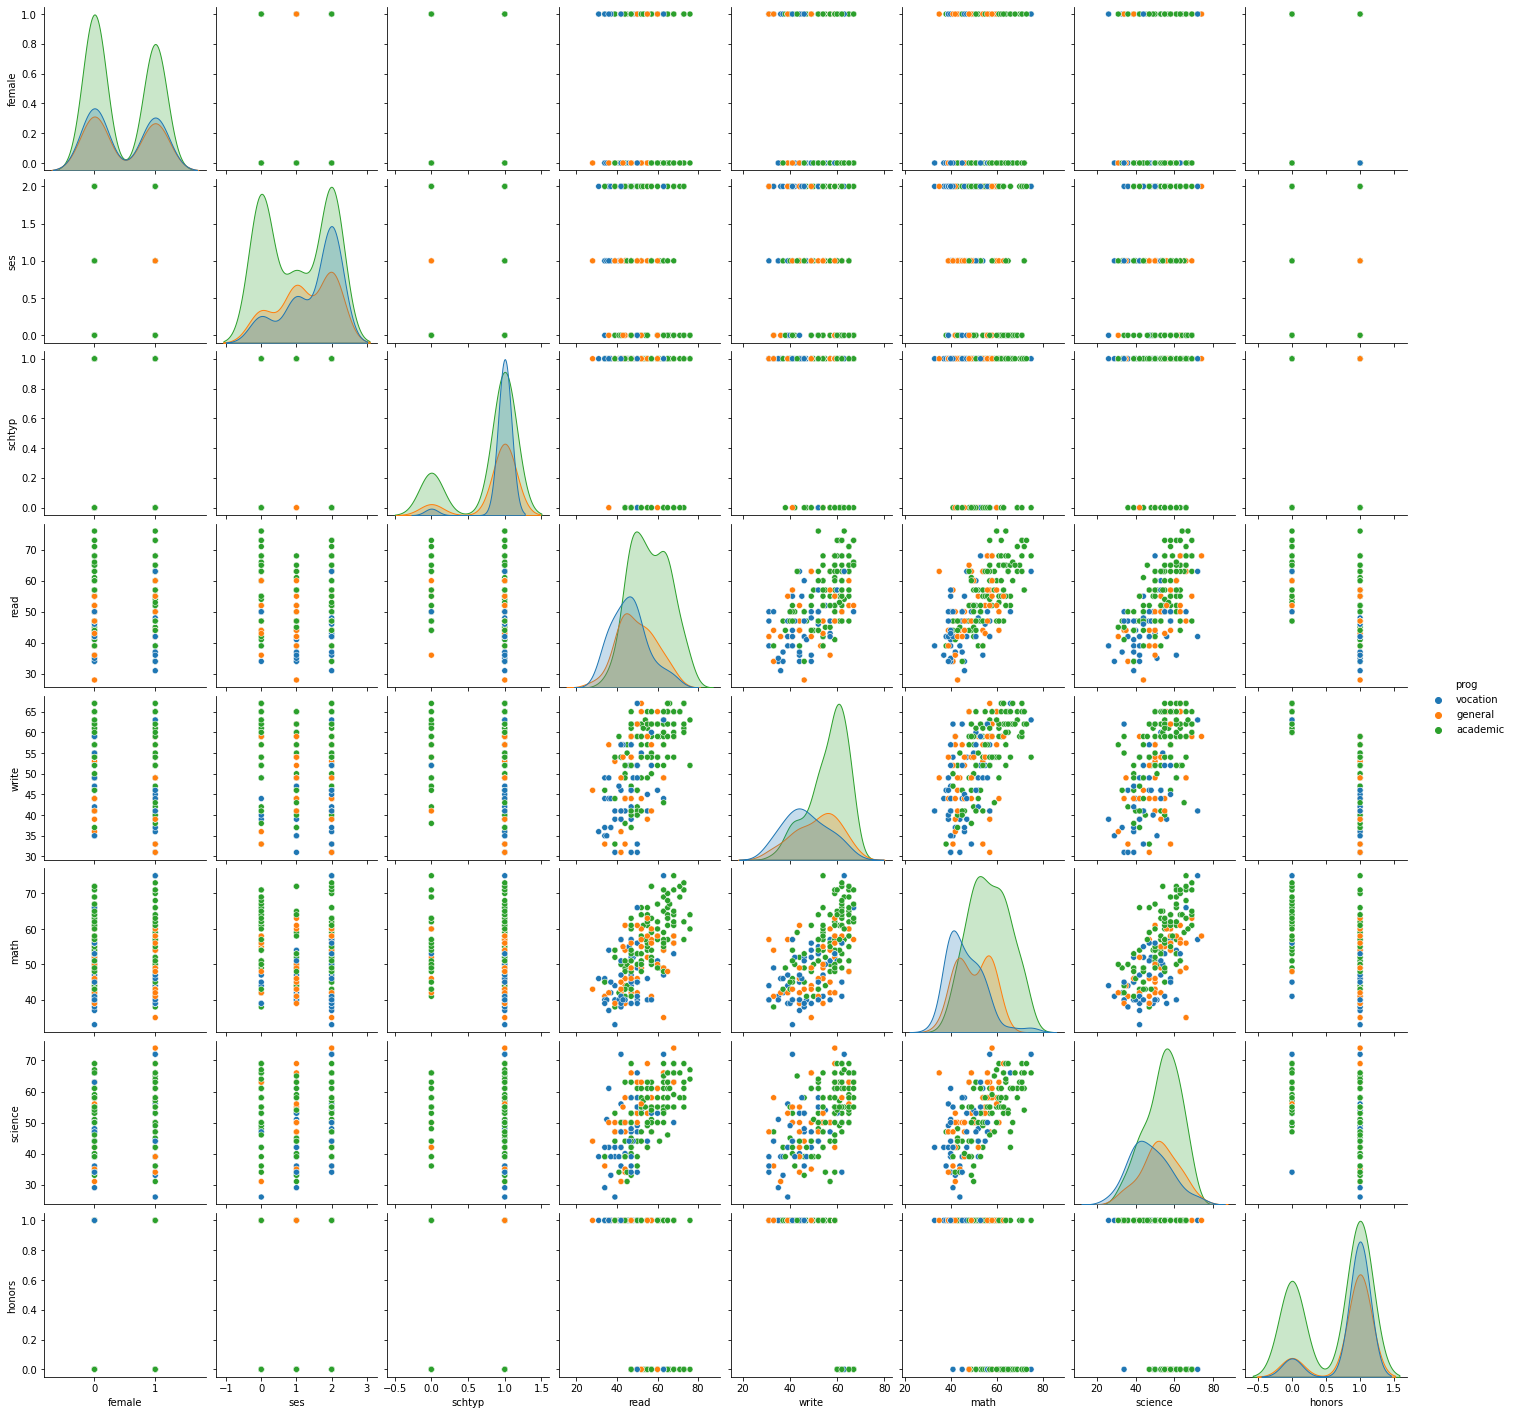

In [15]:
sns.pairplot(mdata, hue='prog') 

In [16]:
##spliting into test and train data#
train,test = train_test_split(mdata, test_size=0.2)

In [17]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train.iloc[:,[0,1,2,4,5,6,7,8]],train.iloc[:,3])

In [18]:
##prediction on test data#
test_prediction=model.predict(test.iloc[:,[0,1,2,4,5,6,7,8]])

In [19]:
##test Accuracy#
accuracy_score(test.iloc[:,3], test_prediction)

0.625

In [20]:
##train prediction#
train_prediction= model.predict(train.iloc[:,[0,1,2,4,5,6,7,8]])

In [21]:
##accuracy of test#
accuracy_score(train.iloc[:,3], train_prediction)

0.64375

PROBLEM 2#

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [24]:
#LOADING DATA#
loan= pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_Multinomial\\loan.csv')

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_4900\2028540531.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan= pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_Multinomial\\loan.csv')


In [26]:
loan.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [28]:
loan.tail(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

In [29]:
##taking required colums#
loan=loan.iloc[:,:17]

In [30]:
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83     C        C4   
2       36 months   15.96%        84.33     C        C5   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
...           ...      ...          ...   ...       ...   
39712   36 months    8.07%        78.42     A        A4   
39713   36 months   10.28%       275.38     C        C1   
39714   36 months    8.07%       156.84     A        A4   
39715   36 months    7.43%       155.38     A        A2   
39716   36 months   13.75%       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                             NaN  10+ years           RENT     24000.0   
1                           Ryder   < 1 year           RENT     30000.0   
2                             NaN  10+ years           RENT     12252.0   
3             AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        University Medical Group     1 year           RENT     80000.0   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE    110000.0   
39713  Squarewave Solutions, Ltd.    3 years           RENT     18000.0   
39714                         NaN   < 1 year       MORTGAGE    100000.0   
39715                         NaN   < 1 year       MORTGAGE    200000.0   
39716            Evergreen Center   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status  
0                Verified  Dec-11   Fully Paid  
1         Source Verified  Dec-11  Charged Off  
2            Not Verified  Dec-11   Fully Paid  
3         Source Verified  Dec-11   Fully Paid  
4         Source Verified  Dec-11      Current  
...                   ...     ...          ...  
39712        Not Verified  Jul-07   Fully Paid  
39713        Not Verified  Jul-07   Fully Paid  
39714        Not Verified  Jul-07   Fully Paid  
39715        Not Verified  Jul-07   Fully Paid  
39716        Not Verified  Jun-07   Fully Paid  

[39717 rows x 17 columns]

In [31]:
##from that data removing unwanted column #
loan.drop(loan.iloc[:,[0,1,10,11,15]],axis=1, inplace=True)

In [32]:
loan.head(10)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   
5       5000         5000           5000.0   36 months    7.90%       156.46   
6       7000         7000           7000.0   60 months   15.96%       170.08   
7       3000         3000           3000.0   36 months   18.64%       109.43   
8       5600         5600           5600.0   60 months   21.28%       152.39   
9       5375         5375           5350.0   60 months   12.69%       121.45   

  grade sub_grade home_ownership  annual_inc verification_status  loan_status  
0     B        B2           RENT     24000.0            Verified   Fully Paid  
1     C        C4           RENT     30000.0     Source Verified  Charged Off  
2     C        C5           RENT     12252.0        Not Verified   Fully Paid  
3     C        C1           RENT     49200.0     Source Verified   Fully Paid  
4     B        B5           RENT     80000.0     Source Verified      Current  
5     A        A4           RENT     36000.0     Source Verified   Fully Paid  
6     C        C5           RENT     47004.0        Not Verified   Fully Paid  
7     E        E1           RENT     48000.0     Source Verified   Fully Paid  
8     F        F2            OWN     40000.0     Source Verified  Charged Off  
9     B        B5           RENT     15000.0            Verified  Charged Off

In [34]:
##EDA#
loan.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment    annual_inc
count  39717.000000  39717.000000     39717.000000  39717.000000  3.971700e+04
mean   11219.443815  10947.713196     10397.448868    324.561922  6.896893e+04
std     7456.670694   7187.238670      7128.450439    208.874874  6.379377e+04
min      500.000000    500.000000         0.000000     15.690000  4.000000e+03
25%     5500.000000   5400.000000      5000.000000    167.020000  4.040400e+04
50%    10000.000000   9600.000000      8975.000000    280.220000  5.900000e+04
75%    15000.000000  15000.000000     14400.000000    430.780000  8.230000e+04
max    35000.000000  35000.000000     35000.000000   1305.190000  6.000000e+06

In [35]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [37]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status'],
      dtype='object')

In [40]:
#label encoding for categorical data#
lb= LabelEncoder()
loan['term'] = lb.fit_transform(loan['term'])
loan['grade'] = lb.fit_transform(loan['grade'])
loan['sub_grade'] = lb.fit_transform(loan['sub_grade'])
loan['home_ownership'] = lb.fit_transform(loan['home_ownership'])
loan['verification_status'] = lb.fit_transform(loan['verification_status'])

In [41]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment  grade  \
0       5000         5000           4975.0     0   10.65%       162.87      1   
1       2500         2500           2500.0     1   15.27%        59.83      2   
2       2400         2400           2400.0     0   15.96%        84.33      2   
3      10000        10000          10000.0     0   13.49%       339.31      2   
4       3000         3000           3000.0     1   12.69%        67.79      1   

   sub_grade  home_ownership  annual_inc  verification_status  loan_status  
0          6               4     24000.0                    2   Fully Paid  
1         13               4     30000.0                    1  Charged Off  
2         14               4     12252.0                    0   Fully Paid  
3         10               4     49200.0                    1   Fully Paid  
4          9               4     80000.0                    1      Current

In [43]:
##we have to convert % value to float in interrest column#
loan['int_rate']=loan['int_rate'].str.rstrip('%').astype(float)

In [44]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0       5000         5000           4975.0     0     10.65       162.87   
1       2500         2500           2500.0     1     15.27        59.83   
2       2400         2400           2400.0     0     15.96        84.33   
3      10000        10000          10000.0     0     13.49       339.31   
4       3000         3000           3000.0     1     12.69        67.79   

   grade  sub_grade  home_ownership  annual_inc  verification_status  \
0      1          6               4     24000.0                    2   
1      2         13               4     30000.0                    1   
2      2         14               4     12252.0                    0   
3      2         10               4     49200.0                    1   
4      1          9               4     80000.0                    1   

   loan_status  
0   Fully Paid  
1  Charged Off  
2   Fully Paid  
3   Fully Paid  
4      Current

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

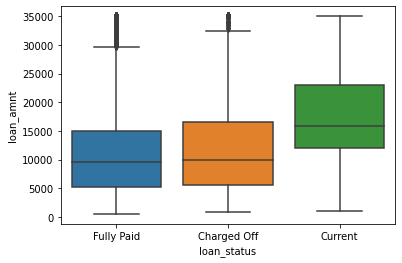

In [58]:
##boxplotting#
sns.boxplot(x='loan_status', y='loan_amnt', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

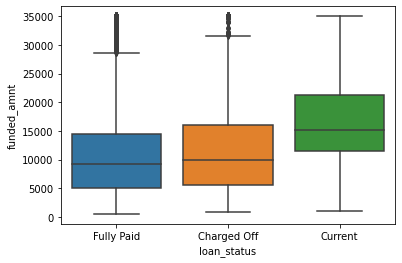

In [47]:
sns.boxplot(x='loan_status', y='funded_amnt', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

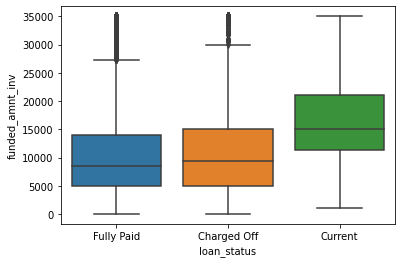

In [49]:
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='term'>

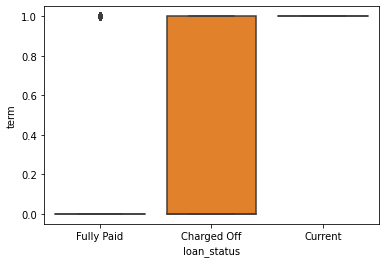

In [50]:
sns.boxplot(x='loan_status', y='term', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

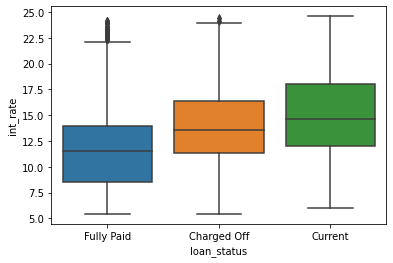

In [51]:
sns.boxplot(x='loan_status', y='int_rate', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

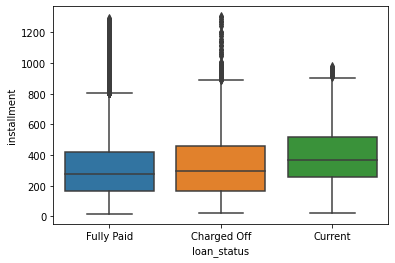

In [52]:
sns.boxplot(x='loan_status', y='installment', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='grade'>

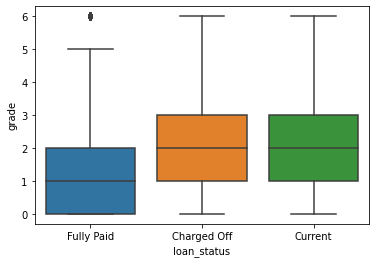

In [53]:
sns.boxplot(x='loan_status', y='grade', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='sub_grade'>

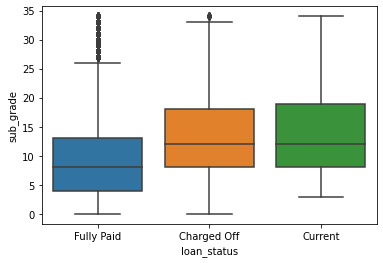

In [54]:
sns.boxplot(x='loan_status', y='sub_grade', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='home_ownership'>

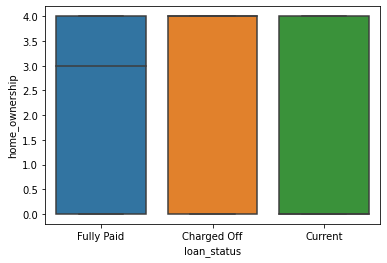

In [55]:
sns.boxplot(x='loan_status', y='home_ownership', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

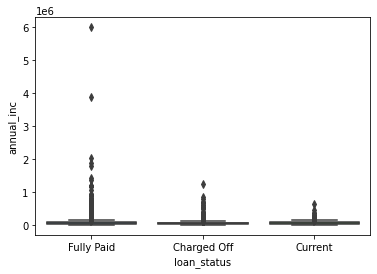

In [56]:
sns.boxplot(x='loan_status', y='annual_inc', data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='verification_status'>

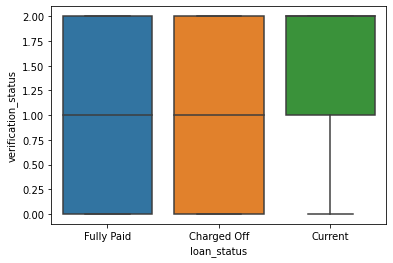

In [57]:
sns.boxplot(x='loan_status', y='verification_status', data=loan)

In [59]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status'],
      dtype='object')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

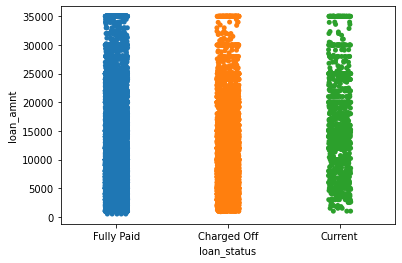

In [62]:
##scatter plot#
sns.stripplot(x = "loan_status", y = "loan_amnt", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

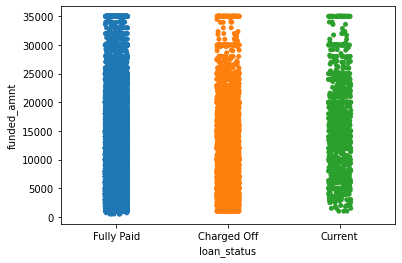

In [63]:
sns.stripplot(x = "loan_status", y = "funded_amnt", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

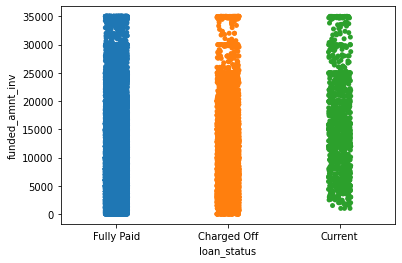

In [64]:
sns.stripplot(x = "loan_status", y = "funded_amnt_inv", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='term'>

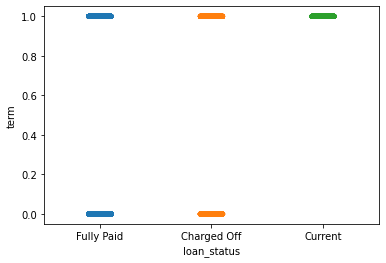

In [65]:
sns.stripplot(x = "loan_status", y = "term", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

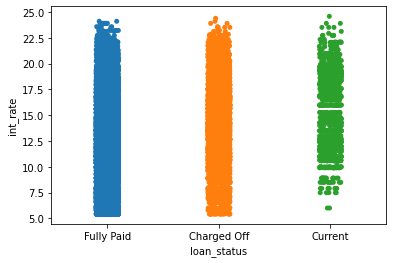

In [66]:
sns.stripplot(x = "loan_status", y = "int_rate", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

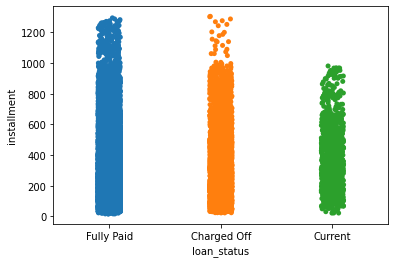

In [67]:
sns.stripplot(x = "loan_status", y = "installment", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='grade'>

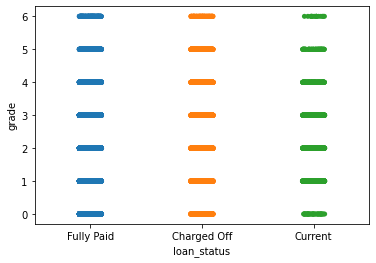

In [68]:
sns.stripplot(x = "loan_status", y = "grade", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='sub_grade'>

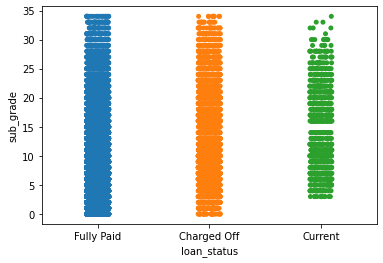

In [69]:
sns.stripplot(x = "loan_status", y = "sub_grade", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='home_ownership'>

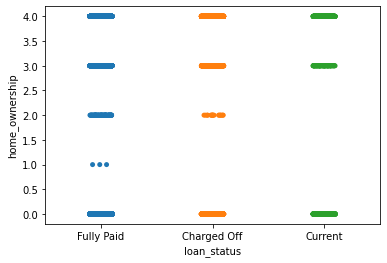

In [70]:
sns.stripplot(x = "loan_status", y = "home_ownership", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

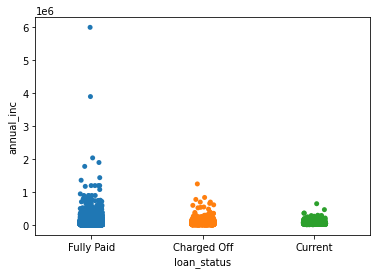

In [71]:
sns.stripplot(x = "loan_status", y = "annual_inc", jitter = True, data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='verification_status'>

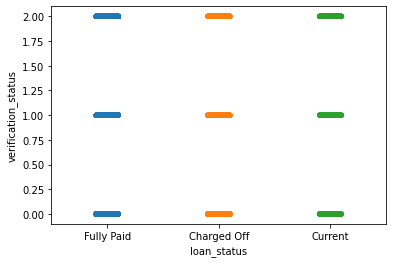

In [72]:
sns.stripplot(x = "loan_status", y = "verification_status", jitter = True, data = loan)

In [76]:
##correlation matrix#
loan.corr()

loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt             1.000000     0.981578         0.940034  0.361036   
funded_amnt           0.981578     1.000000         0.958422  0.340510   
funded_amnt_inv       0.940034     0.958422         1.000000  0.360747   
term                  0.361036     0.340510         0.360747  1.000000   
int_rate              0.309415     0.312619         0.306657  0.451699   
installment           0.930288     0.956159         0.905039  0.101973   
grade                 0.290447     0.291034         0.268682  0.430900   
sub_grade             0.302329     0.301621         0.279219  0.441739   
home_ownership       -0.175968    -0.170489        -0.167500 -0.106522   
annual_inc            0.271149     0.266965         0.254375  0.046675   
verification_status   0.416186     0.409789         0.423062  0.257458   

                     int_rate  installment     grade  sub_grade  \
loan_amnt            0.309415     0.930288  0.290447   0.302329   
funded_amnt          0.312619     0.956159  0.291034   0.301621   
funded_amnt_inv      0.306657     0.905039  0.268682   0.279219   
term                 0.451699     0.101973  0.430900   0.441739   
int_rate             1.000000     0.282703  0.948627   0.961573   
installment          0.282703     1.000000  0.267104   0.276086   
grade                0.948627     0.267104  1.000000   0.979566   
sub_grade            0.961573     0.276086  0.979566   1.000000   
home_ownership       0.064337    -0.138246  0.054169   0.055989   
annual_inc           0.053185     0.270874  0.054913   0.056452   
verification_status  0.210899     0.361562  0.192740   0.200433   

                     home_ownership  annual_inc  verification_status  
loan_amnt                 -0.175968    0.271149             0.416186  
funded_amnt               -0.170489    0.266965             0.409789  
funded_amnt_inv           -0.167500    0.254375             0.423062  
term                      -0.106522    0.046675             0.257458  
int_rate                   0.064337    0.053185             0.210899  
installment               -0.138246    0.270874             0.361562  
grade                      0.054169    0.054913             0.192740  
sub_grade                  0.055989    0.056452             0.200433  
home_ownership             1.000000   -0.197778            -0.081519  
annual_inc                -0.197778    1.000000             0.125413  
verification_status       -0.081519    0.125413             1.000000

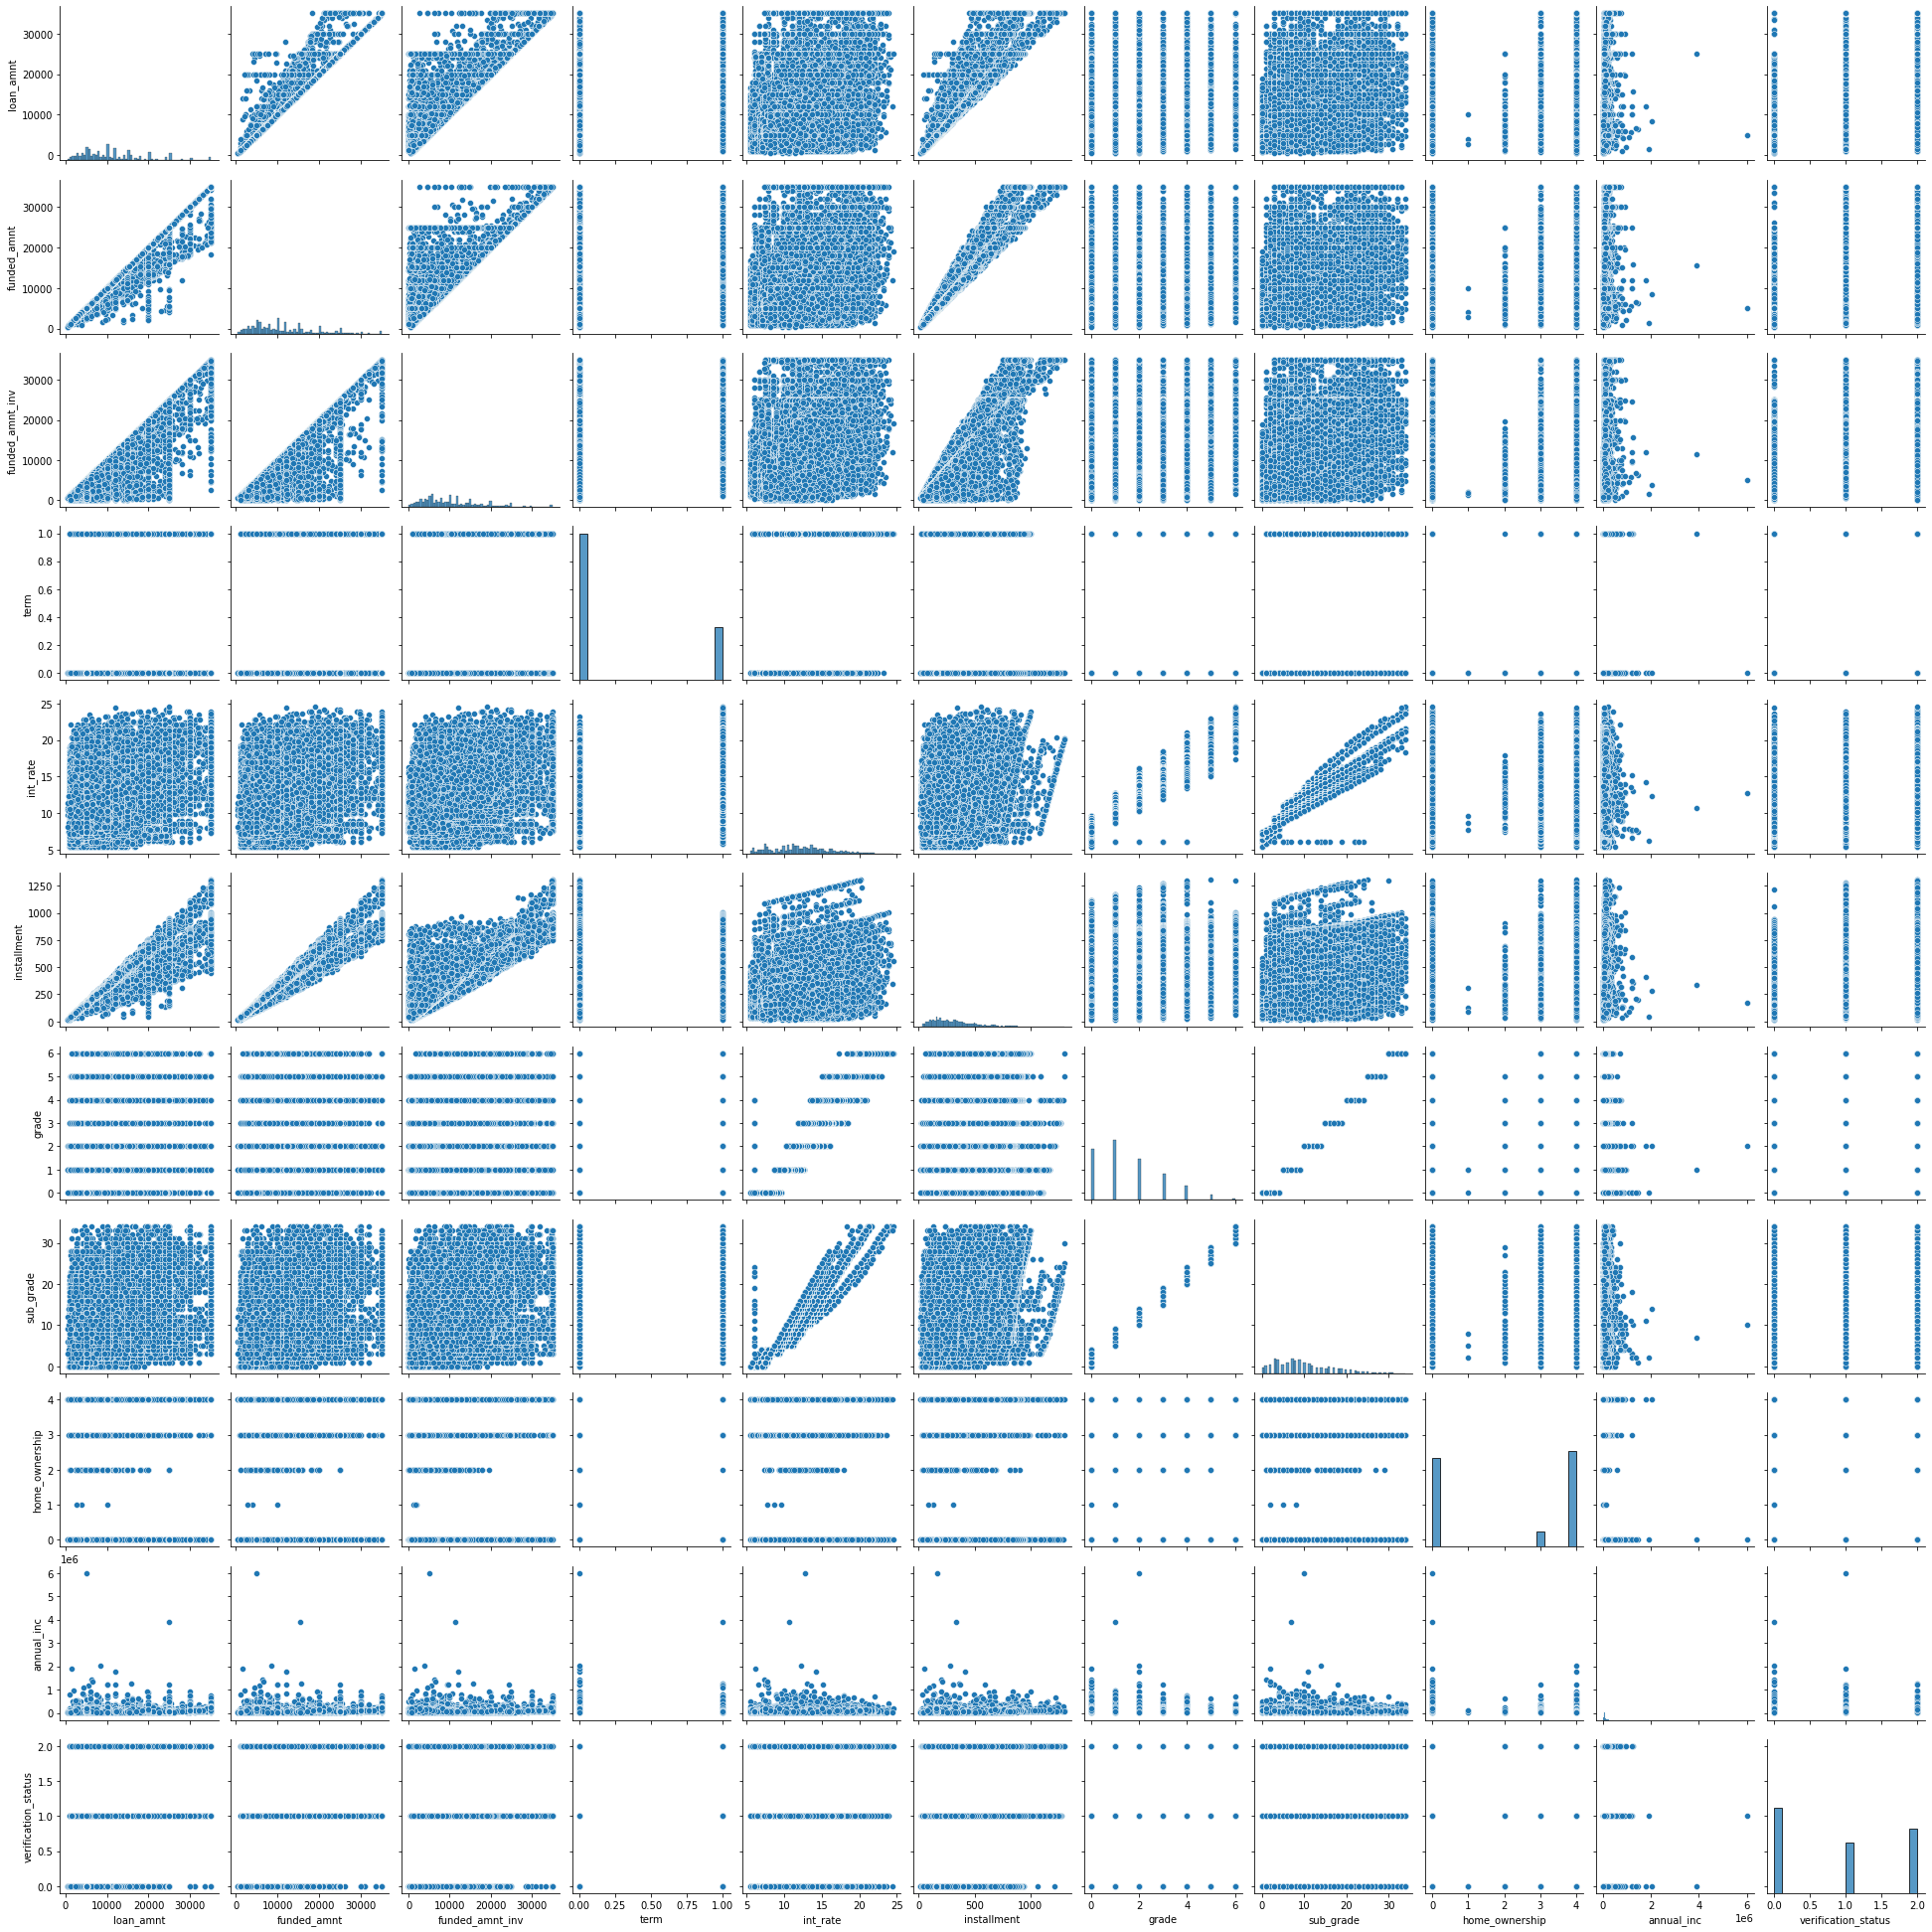

In [73]:
##scatterplot#
sns.pairplot(loan)

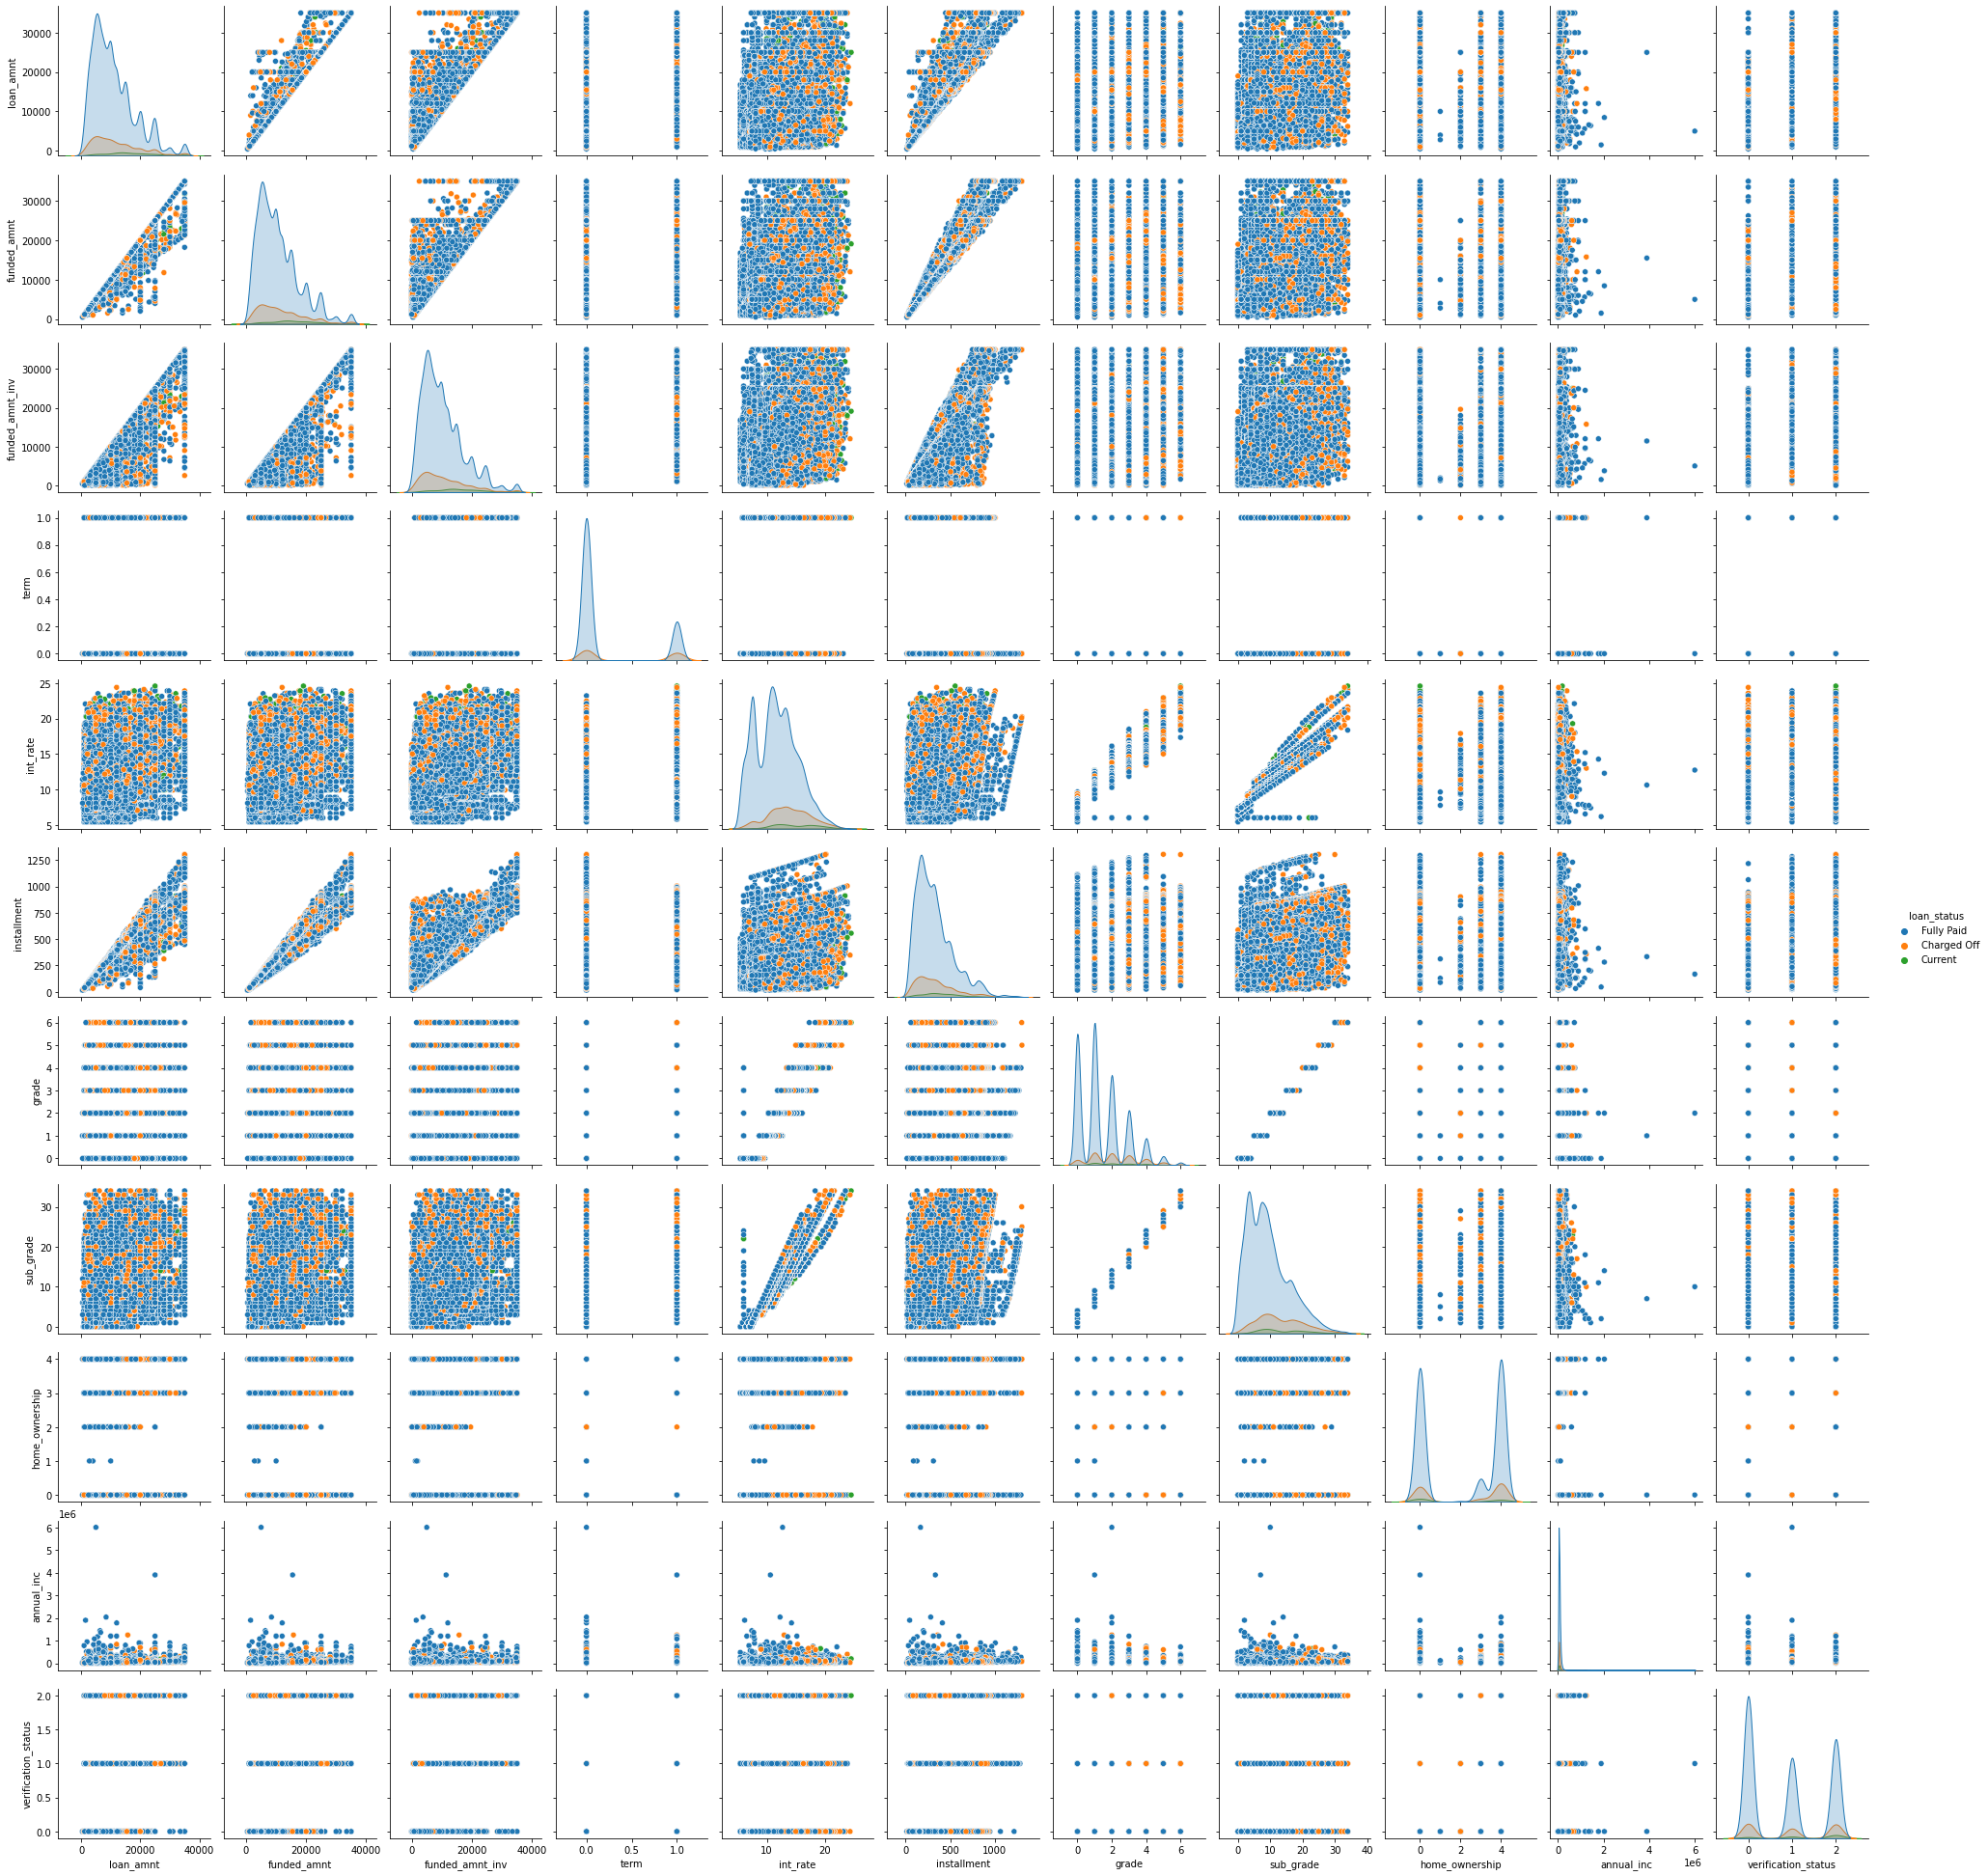

In [75]:
sns.pairplot(loan,hue='loan_status')# With showing the category choice in the scatter plot


In [77]:
##splitting into train and test#
train,test =train_test_split(loan,test_size=0.2)

In [80]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train.iloc[:,:11],train.iloc[:,11])

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [81]:
#test data predcition#
test_predict = model.predict(test.iloc[:,:11])

In [82]:
##test accuracy#
accuracy_score(test.iloc[:,11],test_predict)

0.8362286002014099

In [83]:
#train data predcition#
train_predict = model.predict(train.iloc[:,:11])

In [84]:
##train accuracy#
accuracy_score(train.iloc[:,11],train_predict)

0.828061561703333

##########################################################################